<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/PSO_cv05_en.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5 - Intensity Histogram and Intensity Modification

In this lab we will work with grayscale images and their histograms. We will modify intensities of images to obtain better contrast and perform thresholding.

We will first download some images.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png

!ls

--2023-10-13 16:46:52--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/building.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57259 (56K) [image/jpeg]
Saving to: ‘building.jpg.1’

building.jpg.1      100%[===================>]  55.92K  --.-KB/s    in 0.05s   

2023-10-13 16:46:53 (1.20 MB/s) - ‘building.jpg.1’ saved [57259/57259]

--2023-10-13 16:46:53--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/landscape_dull.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1403462 (1.3M) [image

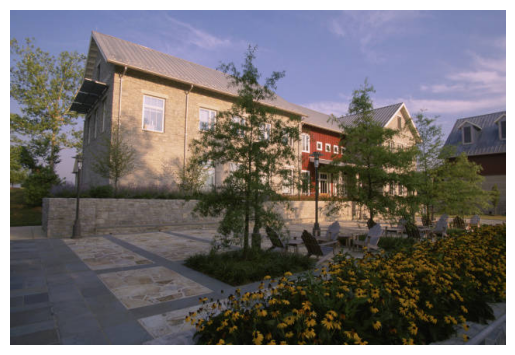

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread('building.jpg')
plt.imshow(img[:, :, ::-1])
plt.axis('off')
plt.show()

## Histogram

We will now create a histogram of our image. We simply take the intensity values of the pixels and calculate the histogram. There are multiple ways how to do it. We can obtain the histogram using NumPy, OpenCV or directly plot it in matplotlib.


Keep in mind that you have to convert the image to grayscale first.

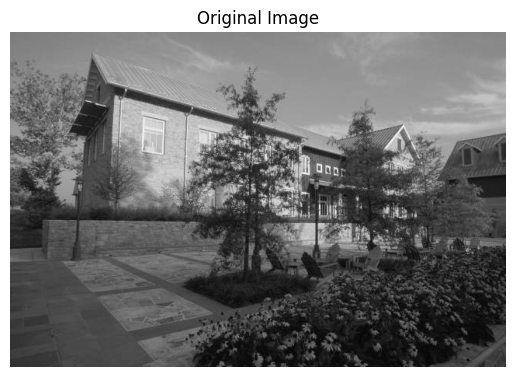

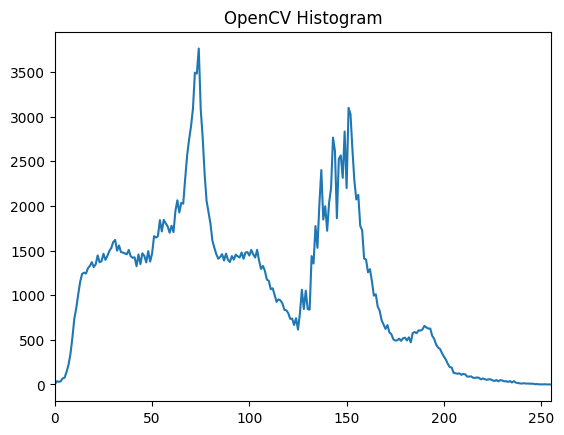

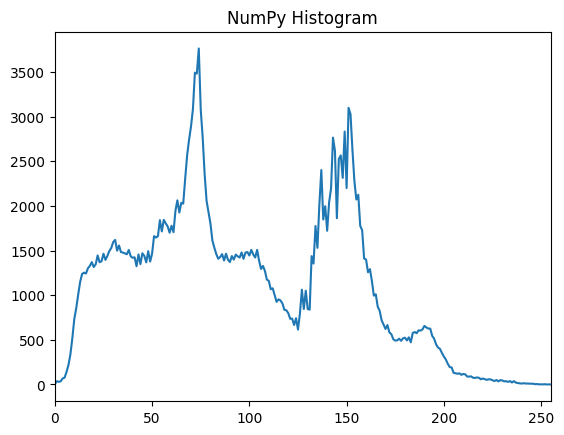

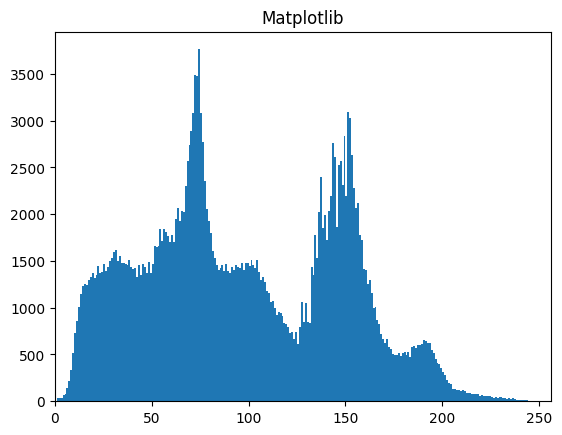

In [ ]:
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_g, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()


hist = cv2.calcHist([img_g],[0],None,[256],[0,256])
plt.plot(hist)
plt.title('OpenCV Histogram')
plt.xlim([0, 255])
plt.show()


hist,bins = np.histogram(img_g.ravel(),256,[0,256])
plt.plot(hist)
plt.title('NumPy Histogram')
plt.xlim([0, 255])
plt.show()


plt.hist(img_g.ravel(), 256,[0,256])
plt.title('Matplotlib')
plt.xlim([0, 256])
plt.show()


### Exercise 1 - Color Histogram

We have produced a histogram for the grayscale image. Now try to produce a plot which contains the histograms for the three different channels. Make the colors of the plot lines correspond to the channel color (BGR).

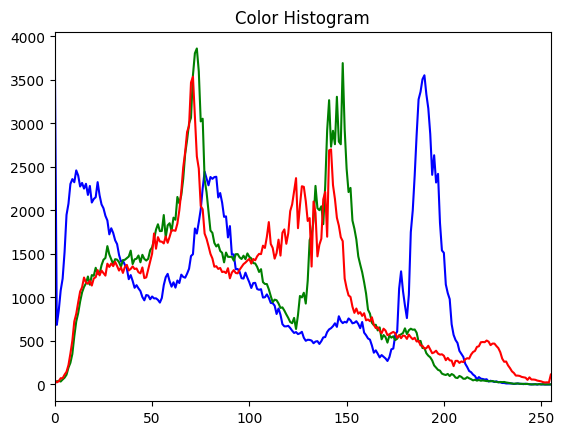

In [ ]:
...

### Exercise 2 - Histogram masking

You can notice that there are three peaks in the grayscale histogram. Try to modify the image so that pixels from one of the three peaks are all completely white.

For two of the peaks you can simply use logical indexing with common operators. If you want to obtain the middle peak you could find the [NumPy logical operators](https://numpy.org/doc/stable/reference/routines.logic.html#logical-operations) useful.

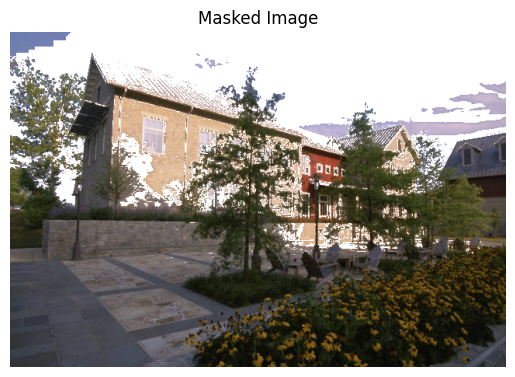

In [ ]:
...

### Exercise 3 - Intensity Transformations

Sometimes we want to modify an image to obain better contrast. We can do this in various ways. Two simple methods are based on modification of individual pixels. Let $I$ be a grayscale image and $I_{i, j}$ a single pixel. Let the output image be $O$ with $O_{i, j}$ being a single pixel. We can modify the grayscale intensity in a linear manner:

$$O_{i, j} = \frac{I_{i, j} - \min(I)}{\max(I) - \min(I)}$$

Another method is gamma correction. We now assume that $I$ is in the range from 0 to 1 (in floats).

$$O_{i, j} = I_{i, j}^{\frac{1}{G}},$$

where $G$ is the gamma factor.

Implement both of these methods into the function definitions provided below.

In [ ]:
def linear_intensity_transform(img):
  ...

def gamma_transform(img, G):
  ...

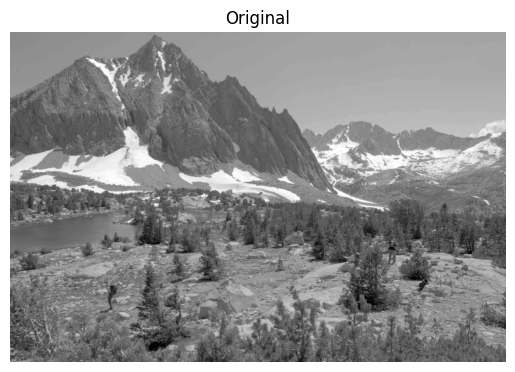

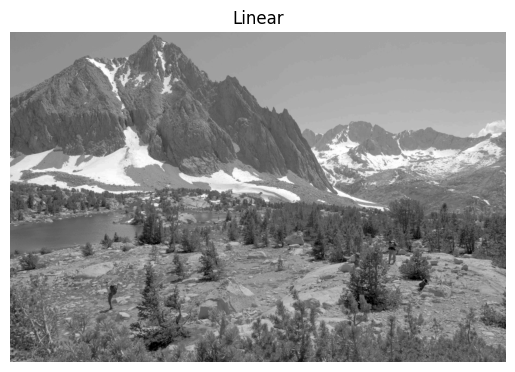

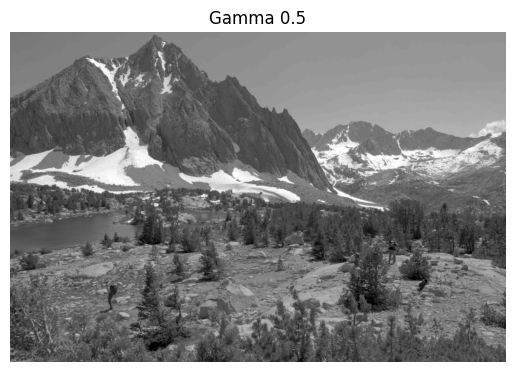

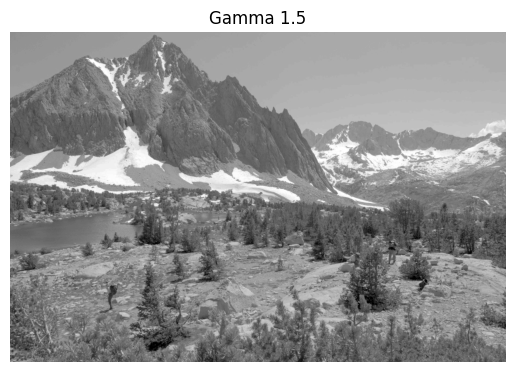

In [ ]:
img_landscape = cv2.cvtColor(cv2.imread('landscape_dull.png'), cv2.COLOR_BGR2GRAY)

plt.imshow(img_landscape, cmap='gray')
plt.axis('off')
plt.title('Original')
plt.show()


plt.imshow(linear_intensity_transform(img_landscape), cmap='gray')
plt.axis('off')
plt.title('Linear')
plt.show()


plt.imshow(gamma_transform(img_landscape, 0.5), cmap='gray')
plt.axis('off')
plt.title('Gamma 0.5')
plt.show()


plt.imshow(gamma_transform(img_landscape, 1.5), cmap='gray')
plt.axis('off')
plt.title('Gamma 1.5')
plt.show()

## Histogram Equalization

We can also perform a more sophisticated transformation, more specifically [histogram equalization](https://en.wikipedia.org/wiki/Histogram_equalization). This can be performed using OpenCV function [`equalizeHist`](https://docs.opencv.org/4.8.0/d6/dc7/group__imgproc__hist.html#ga7e54091f0c937d49bf84152a16f76d6e).

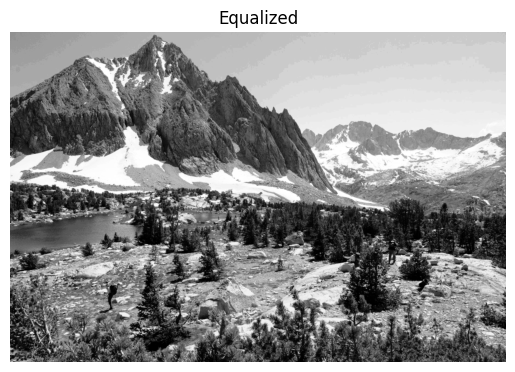

In [ ]:
img_landscape = cv2.cvtColor(cv2.imread('landscape_dull.png'), cv2.COLOR_BGR2GRAY)
img_landscape_eq = cv2.equalizeHist(img_landscape)

plt.imshow(img_landscape_eq, cmap='gray')
plt.title('Equalized')
plt.axis('off')
plt.show()

### Exercise 4 - Histograms for the methods

Plot all of the histograms for the three different methods.

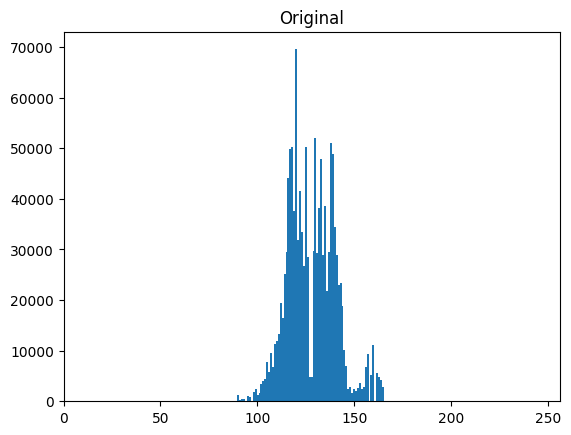

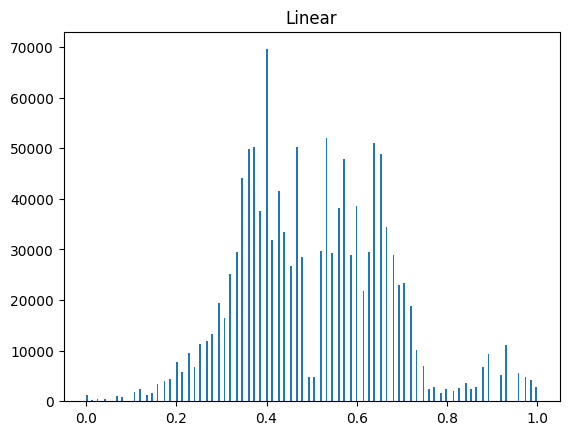

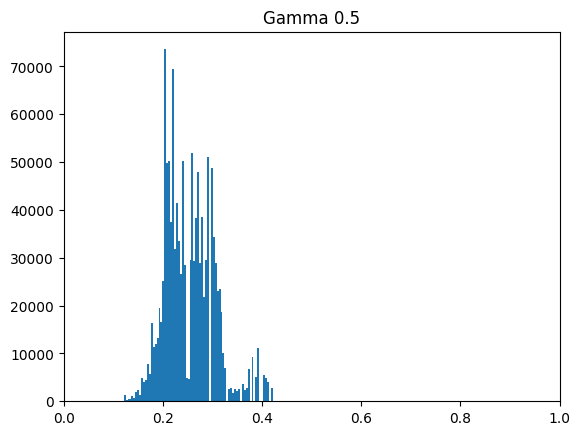

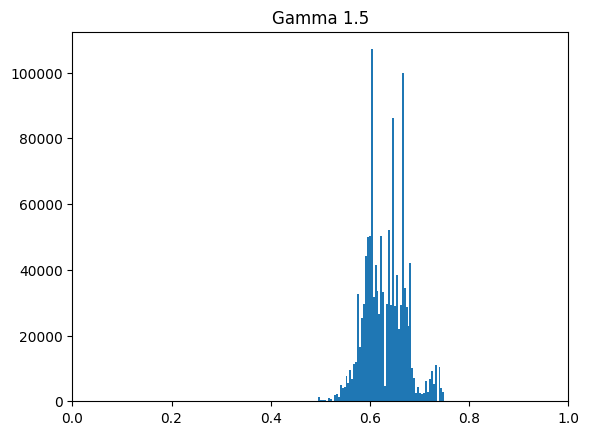

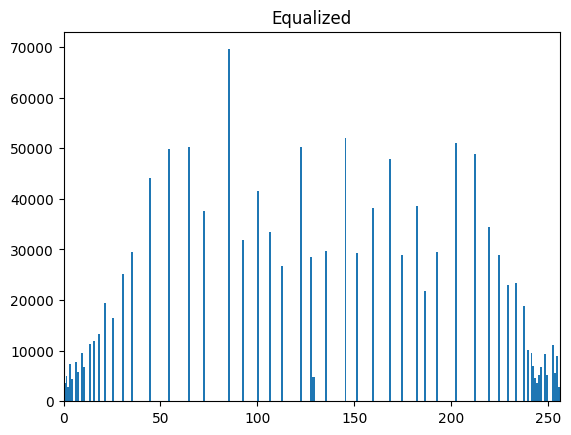

In [ ]:
...

## Noise

We will also work with blurring in this lab. To see the effects of blurring we will implement some basic methods to blur grayscale images.

### Exercise 5 - Noises

One type of blur is the additive white gaussian noise. This type of noise adds values from normal distribution to the original image. The standard deviation of this distribution is a parameter of the added noise. Implement the function `noisify(I, sigma)` which takes the image and the standard deviation of the noise on input and outputs an image with noise added. For this type of noise you should use `np.random.randn`.



The second type of noise is called the impulse noise or salt and pepper noise. This type of noise simply changes a given pixel to the minimum value or maximum value with a given probability. Implement this in the method `impulse_noisify(I, p_min, p_max)`. For this type of noise you should use `np.random.rand`.


In [ ]:
def noisify(img, sigma):
  ...

def impulse_noisify(img, p_min, p_max):
  ...

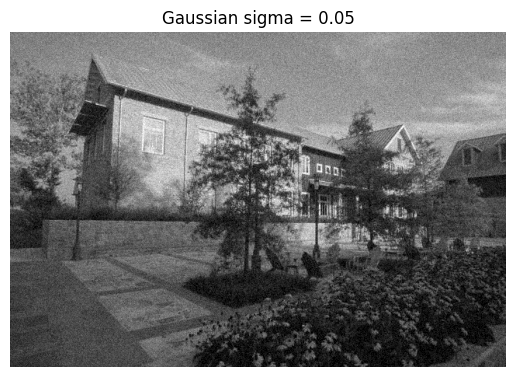

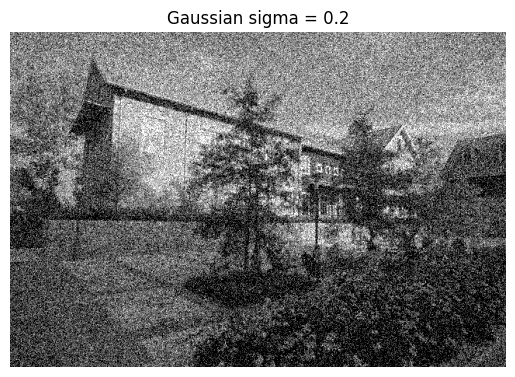

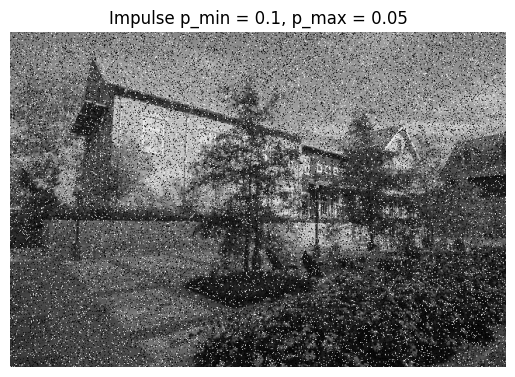

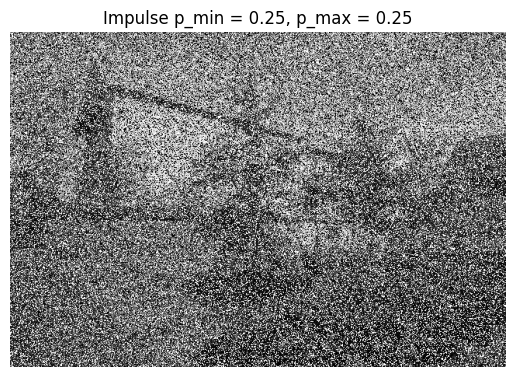

In [ ]:
img = cv2.imread('building.jpg')
img_g = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) / 255.0

plt.imshow(noisify(img_g, 0.05), cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian sigma = 0.05')
plt.axis('off')

plt.show()

plt.imshow(noisify(img_g, 0.2), cmap='gray', vmin=0, vmax=1)
plt.title('Gaussian sigma = 0.2')
plt.axis('off')
plt.show()

plt.imshow(impulse_noisify(img_g, 0.1, 0.05), cmap='gray', vmin=0, vmax=1)
plt.title('Impulse p_min = 0.1, p_max = 0.05')
plt.axis('off')
plt.show()

plt.imshow(impulse_noisify(img_g, 0.25, 0.25), cmap='gray', vmin=0, vmax=1)
plt.title('Impulse p_min = 0.25, p_max = 0.25')
plt.axis('off')
plt.show()

## Image Smoothing

Almost all images taken by camera have some level of noise. Usually the noise is not so significant, but still it might be pose challenges when further processing images. It is therefore very important to be able to suppress noise in images.






### Exercise 6

We will now see how different blurring algorithms work to help with noise. Check the [documentation on image smoothing in OpenCV](https://docs.opencv.org/4.8.0/d4/d13/tutorial_py_filtering.html) and try the four different image smoothing methods on images with both gaussian and impulse noise.

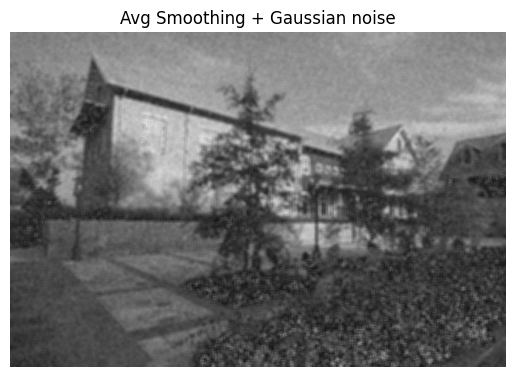

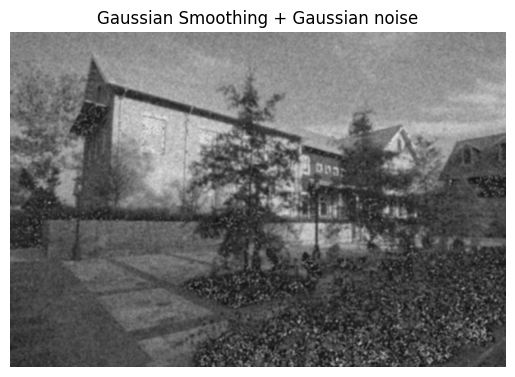

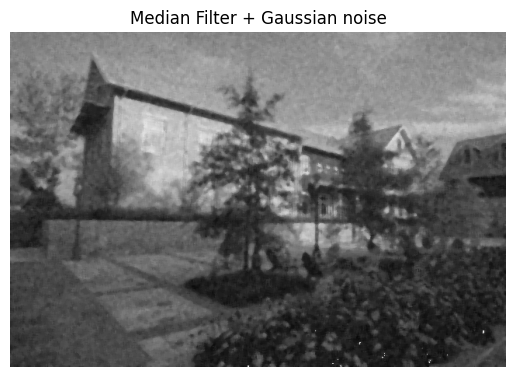

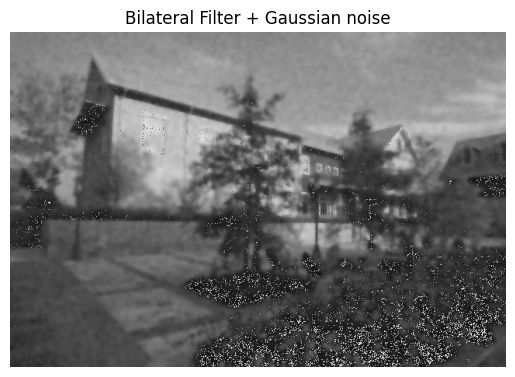

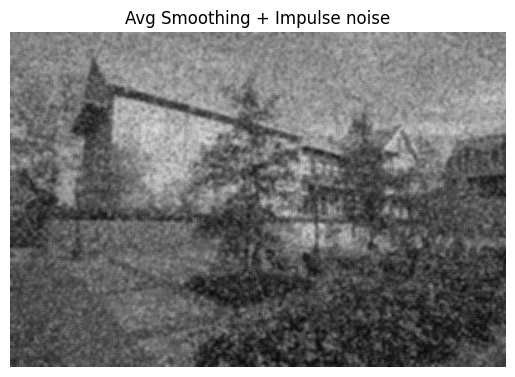

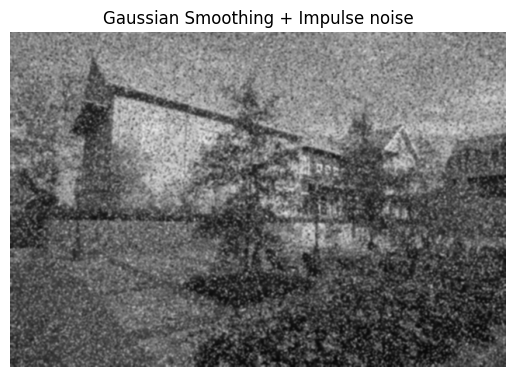

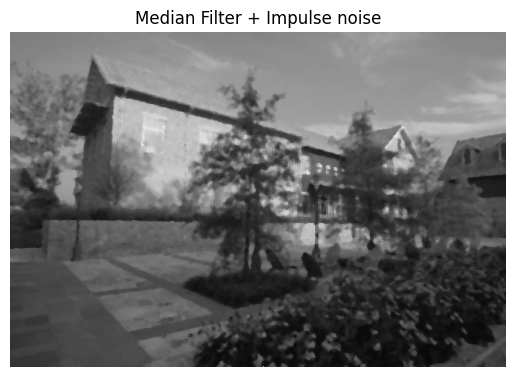

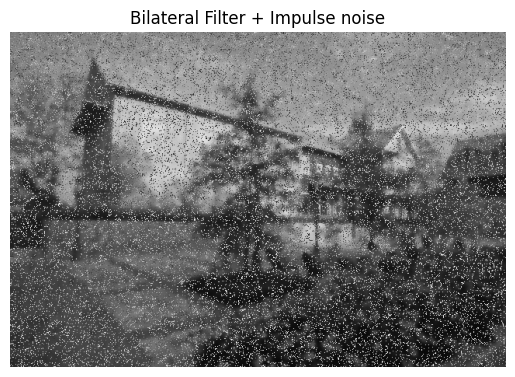

In [ ]:
...

## Thresholding

Sometimes we also want to separate different parts of the image using thresholding. So far we have done so based on a simple threshold. However this might not work all the time.

We may not know what a good threshold should be. In that case we may want to use Otsu's thresholding.

Other problem that might occur is difference in lighting or overall intensity in different parts of the image. To combat this we may prefer to use adaprive thresholding.

### Exercise 6

Try to threshold the images downloaded in the cell below using different methods as mentioned in the [OpenCV documentation on thresholding](https://docs.opencv.org/4.8.0/d7/d4d/tutorial_py_thresholding.html). Try to get the best resutls by changing the parameters.

In [ ]:
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/good_checkers.png
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bad_checkers.png

--2023-10-13 16:47:05--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/good_checkers.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159613 (156K) [image/png]
Saving to: ‘good_checkers.png.2’

good_checkers.png.2 100%[===================>] 155.87K  --.-KB/s    in 0.1s    

2023-10-13 16:47:06 (1.52 MB/s) - ‘good_checkers.png.2’ saved [159613/159613]

--2023-10-13 16:47:06--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bad_checkers.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53019

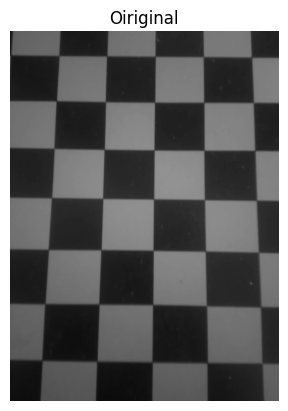

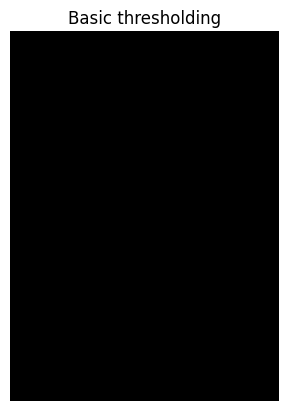

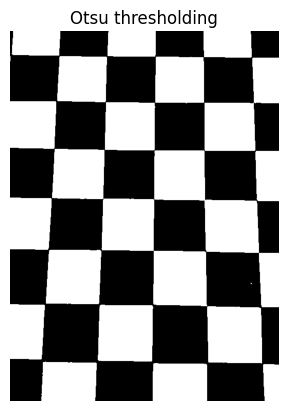

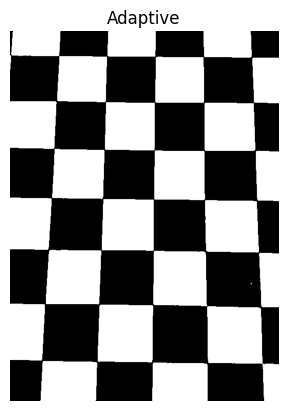

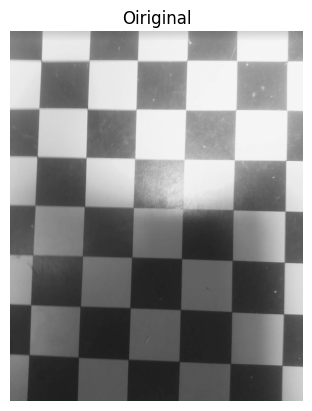

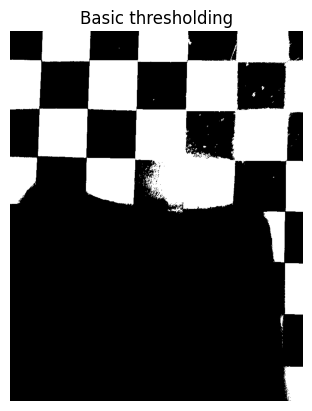

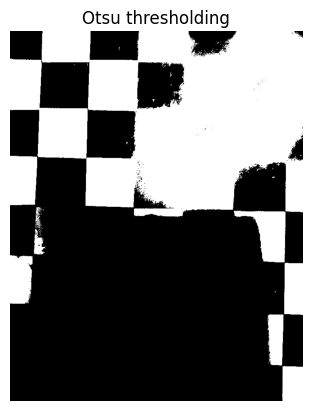

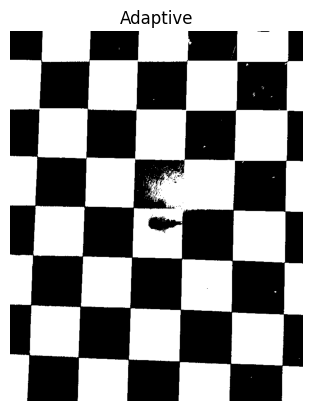

In [ ]:
...